# Gathering Phase:

In [12]:
# Import the necessary libraries for gathering-phase 
# code.

import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import requests
import os
import json

In [13]:
# Extraction of web address for the image-predictions 
# data.

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)    

In [21]:
response

<Response [200]>

In [22]:
# Create file for the image-predictions data.

with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

In [16]:
# Read Twitter "rating" data file and create 
# corresponding dataframe.

rating_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [17]:
# Read Twitter "image predictions" data file and 
# create corresponding dataframe.

image_preds = pd.read_csv('image-predictions.csv')

In [23]:
#Using Twitter developer-authorization credentials and 
# the tweepy library, create API object with parameters 
# for waiting out the Twitter extraction-rate limit.
# (Ref.: Tweepy library documentation, with thanks to
# mentors Elisa and Ron)

consumer_key = 

consumer_secret = 

access_token = 

access_secret = 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(),
                wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Timer and count variables for tracking purposes.

from timeit import default_timer as time

starting = time()

success_count = 0

failure_count = 0

failure_id_list = []

# Using the rating data as a guide, the API object will
# create the text file from the JSON data by looping
# through each tweet id number, noting any failed
# extractions.

tweet_ids = rating_archive.tweet_id.values

with open('tweet_json.txt', 'w') as out_file:
    
    for tweet_id in tweet_ids:
        success_count += 1
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet, out_file)
            out_file.write('\n')
        except tweepy.TweepError as err:
            failure_count += 1
            print(str(failure_count) + ':' + str(tweet_id))
            failure_id_list.append(tweet_id)
            
            
                

ending = time()
print(ending - starting, '\n')
print(success_count, '\n')
print(failure_count, '\n')


1:888202515573088257
2:873697596434513921
3:872668790621863937
4:872261713294495745
5:869988702071779329
6:866816280283807744
7:861769973181624320
8:845459076796616705
9:842892208864923648
10:837012587749474308
11:827228250799742977
12:812747805718642688
13:802247111496568832
14:775096608509886464
15:770743923962707968
Rate limit reached. Sleeping for: 656
16:754011816964026368
17:680055455951884288
Rate limit reached. Sleeping for: 658
1961.2840290479999 

2356 

17 



In [24]:
# List of failed tweet_ids for removal from subsequent tweets DataFrame.

failure_id_list

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288]

In [25]:
#Conversion of JSON text file to a pandas DataFrame.

df_tweets = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])

with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status["id"]
        retweet_count = status["retweet_count"]
        favorite_count = status["favorite_count"]
        df_tweets = df_tweets.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                    columns=['tweet_id', 'retweet_count', 'favorite_count']))
df_tweets = df_tweets.reset_index(drop=True)
df_tweets.sample(8)

,tweet_id,retweet_count,favorite_count
1029,743595368194129920,6975,19206
653,790581949425475584,7837,22013
666,789137962068021249,3051,10334
635,793120401413079041,4270,13521
2199,668537837512433665,77,253
1966,672964561327235073,654,1433
957,750071704093859840,3571,8243
1615,684481074559381504,1240,4046


## **Assessment Phase:**

1. **Quality Issues**
   * image_preds: tweet_id in exponential float format 
   * image_preds: inconsistent formatting for columns 'p1', 'p2', 'p3'
   * rating_archive: rating denominator is almost always 10, so column is redundant
   * rating_archive: missing data in columns 
                     * 'in_reply_to_status_id'     
                     * 'in_reply_user_id' 
   * rating archive: missing data in columns 
                     * 'retweeted_status_id'
                     * 'retweeted_status_user_id' 
                     * 'retweeted_status_timestamp' 
                      
   * rating_archive: column 'timestamp' is in 'object (string)' format
   * rating_archive: column 'expanded urls' irrelevant to analysis
   * image_preds: 66 duplicated rows
   * image_preds: lack of consistent and defined schema in dog-breed format
   


2. **Tidiness Issues**
   * rating_archive: dog "stages" ("doggo," etc.) are in separate columns
   * rating_archive: column 'text' contains both rating and "stage"
   

   

In [26]:
# Programmtic confirmation of quality issues
rating_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [27]:
# Confirming number of rows and columns
rating_archive.shape

(2356, 17)

In [28]:
# Confirming quality issues in the image-prediction dataset.

image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,6.660210e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,6.660290e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,6.660330e+17,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,6.660440e+17,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,6.660490e+17,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
# Confirming quality issues in the image-prediction dataset.

image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null float64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(4), int64(1), object(4)
memory usage: 152.1+ KB


In [30]:
image_preds.shape

(2075, 12)

In [31]:
df_tweets.shape

(2339, 3)

In [32]:
# Completeness check regarding the constructed tweet DataFrame.

df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null object
retweet_count     2339 non-null object
favorite_count    2339 non-null object
dtypes: object(3)
memory usage: 54.9+ KB


In [33]:
# Finding the retweets in the rating_archive set, citing
# https://stackoverflow.com/questions/27975069/
# how-to-filter-rows-containing-a-string-pattern-from-a-pandas-dataframe

rating_archive[rating_archive['text'].str.contains("RT")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
80,877316821321428993,NaN,NaN,2017-06-21 00:06:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dante. At first he wasn't a fan of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877316821...,13,10,Dante,None,None,None,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None


In [34]:
# Send retweets to a list for ease in cleaning
RT_list = rating_archive[rating_archive['text'].str.contains("RT")].index.tolist()

In [35]:
RT_list

[19,
 32,
 36,
 68,
 73,
 74,
 78,
 80,
 91,
 95,
 97,
 101,
 109,
 118,
 124,
 130,
 132,
 137,
 146,
 155,
 159,
 160,
 165,
 171,
 180,
 182,
 185,
 194,
 195,
 204,
 211,
 212,
 222,
 230,
 231,
 247,
 250,
 260,
 266,
 272,
 273,
 281,
 285,
 286,
 289,
 298,
 302,
 303,
 307,
 309,
 310,
 319,
 327,
 332,
 340,
 341,
 343,
 357,
 359,
 366,
 382,
 386,
 397,
 399,
 406,
 411,
 415,
 420,
 422,
 425,
 431,
 434,
 435,
 438,
 446,
 447,
 450,
 453,
 455,
 462,
 465,
 469,
 475,
 476,
 479,
 485,
 488,
 506,
 522,
 530,
 535,
 538,
 541,
 543,
 546,
 552,
 555,
 558,
 561,
 566,
 568,
 574,
 577,
 581,
 583,
 586,
 589,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 612,
 615,
 618,
 627,
 629,
 634,
 654,
 655,
 656,
 661,
 664,
 669,
 671,
 677,
 682,
 686,
 692,
 694,
 702,
 720,
 728,
 741,
 742,
 745,
 749,
 753,
 759,
 764,
 767,
 770,
 773,
 778,
 784,
 794,
 800,
 811,
 815,
 818,
 822,
 826,
 829,
 833,
 841,
 847,
 860,
 868,
 872,
 885,
 89

In [36]:
# Remove rows which represent retweets.

rating_archive.drop(rating_archive.index[[RT_list]], inplace=True)

In [37]:
rating_archive.shape
rating_archive.columns.values

array(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [38]:
sum(rating_archive.duplicated())

0

In [39]:
sum(df_tweets.duplicated())

0

In [40]:
sum(image_preds.duplicated('jpg_url').values)

66

## Cleaning

*The following lines make copies of each DataFrame for purposes of cleaning the data:*

In [41]:
preds_copy = image_preds.copy()
preds_copy.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,6.660210e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,6.660290e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [42]:
archive_copy = rating_archive.copy()

In [43]:
archive_copy.columns.values

array(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [44]:
tweets_copy = df_tweets.copy()

### Format incorrect for merging

#### image_preds: tweet_id in exponential integer format
#### rating_archive: tweet_id in integer format


##### Define
Cast tweet_ids as integers, then strings.

#### Code

In [86]:
preds_copy.tweet_id = preds_copy.tweet_id.apply(lambda t: str(int(t)))

In [85]:
archive_copy.tweet_id = archive_copy.tweet_id.apply(lambda t: str(int(t)))

#### Test

In [83]:
preds_copy.dtypes

tweet_id              object
jpg_url               object
img_num                int64
prediction_1          object
confidence_lvl_1     float64
predict_1_outcome       bool
prediction_2          object
confidence_lvl_2     float64
predict_2_outcome       bool
prediction_3          object
confidence_lvl_3     float64
predict_3_outcome       bool
dtype: object

In [87]:
archive_copy.dtypes

tweet_id             object
timestamp    datetime64[ns]
source               object
rating                int64
name                 object
stage                object
dtype: object

### Missing data

rating_archive: missing data in columns 'in_reply_to_status_id' and    in_reply_to_user_id'

#### Define

Remove empty 'in_reply_to' columns from archive.

#### Code

In [46]:
removals = ['in_reply_to_status_id', 'in_reply_to_user_id']
archive_copy.drop(removals, axis=1, inplace=True)

### Missing data

#### rating archive: missing data in columns 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'            

#### Define

Remove columns 'retweeted_status_id', 'retweeted_status_user_id',
and 'retweeted_status_timestamp' from archive.

#### Code

In [47]:
more_removals = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
archive_copy.drop(more_removals, axis=1, inplace=True)

### Data violated common schema

#### rating_archive: column 'timestamp' is in 'object (string)' format 

#### Define

Convert 'timestamp' from type object/string to datetime

#### Code

In [48]:
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'])

### Unnecessary data

#### rating_archive: column 'expanded urls' irrelevant to analysis

#### Define 

Remove the column from rating_archive.

#### Code

In [49]:
archive_copy.drop(['expanded_urls'], axis=1, inplace=True)

#### Test

In [50]:
archive_copy.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None


### Variable in multiple columns

#### rating_archive: dog "stages" ("doggo," etc.) are in separate columns

#### Define

For easier cleaning, replace "stage" value 'None' with a single space. 
Create new column 'stage' and populate with contents of the three separate
columns for the "stages."


#### Code

In [51]:
archive_copy.doggo.replace('None', "", inplace=True)
archive_copy.floofer.replace('None', "", inplace=True)
archive_copy.puppo.replace('None', "", inplace=True)
archive_copy.pupper.replace('None', "", inplace=True)

In [52]:
archive_copy['stage'] = archive_copy.doggo + archive_copy.floofer + archive_copy.puppo + archive_copy.pupper

#### Test

In [53]:
archive_copy.stage.value_counts()

                1822
pupper           223
doggo             74
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

### Define

#### Make double-stage values readable.


#### Code

In [54]:
archive_copy.loc[archive_copy.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
archive_copy.loc[archive_copy.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
archive_copy.loc[archive_copy.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'
archive_copy.loc[archive_copy.stage == '', 'stage'] = 'Unknown'

#### Test

In [55]:
archive_copy.stage.value_counts()

Unknown           1822
pupper             223
doggo               74
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

### Redundant and unnecessary data 

#### rating_archive: demoninator is almost always 10, column is redundant

#### Define

Remove unnecessary 'rating_denominator' column (it's almost all 10s)
and the "stage" columns previously merged into one column.

Rename the numerator column to a more meaningful description.

#### Code

In [56]:
to_delete = ['rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo']

archive_copy.drop(to_delete, axis=1, inplace=True)

In [57]:
archive_copy.rename(columns={'rating_numerator': 'rating'}, inplace=True)

#### Test

In [58]:
archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating', 'name', 'stage'], dtype='object')

### Duplicated data

#### image_preds: 66 duplicated rows

#### Define

Determine the duplicated tweets in the predictions copy.

Produce check figure for post-drop dataframe.

Removal of duplicated rows in preds_copy.

#### Code

In [59]:
preds_copy[preds_copy.duplicated('jpg_url', keep='first')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309000000000000,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754875000000000000,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729000000000000,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759160000000000000,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759567000000000000,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371000000000000,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761751000000000000,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078000000000000,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770094000000000000,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171000000000000,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [60]:
len(preds_copy.jpg_url.unique())

2009

#### This code includes the test 

In [61]:
preds_copy.drop_duplicates(subset=['jpg_url'], keep='first')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666021000000000000,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029000000000000,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033000000000000,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044000000000000,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049000000000000,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666051000000000000,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666052000000000000,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666056000000000000,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057000000000000,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666059000000000000,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Data not in common schema

#### image_preds: no-understandable formatting for columns 'p1', 'p2', 'p3'

#### Define

Altering of dog-breed names to single-style format.

Remove unnecessary underscores and ensure all 
first letters are capitalized as a defined schema.

Change column names to make them more meaningful to users.

#### Code

In [62]:
preds_copy['p1'] = preds_copy['p1'].map(lambda s: s.replace("_", " "))
preds_copy['p2'] = preds_copy['p2'].map(lambda s: s.replace("_", " "))
preds_copy['p3'] = preds_copy['p3'].map(lambda s: s.replace("_", " "))

preds_copy['p1'] = preds_copy['p1'].map(lambda s: s.capitalize())
preds_copy['p2'] = preds_copy['p2'].map(lambda s: s.capitalize())
preds_copy['p3'] = preds_copy['p3'].map(lambda s: s.capitalize())

In [63]:
preds_copy.rename(columns={'p1': 'prediction_1', 'p2': 'prediction_2', 'p3': 'prediction_3'}, inplace=True)
preds_copy.rename(columns={'p1_conf': 'confidence_lvl_1', 
                           'p2_conf': 'confidence_lvl_2', 'p3_conf': 'confidence_lvl_3'}, inplace=True)
preds_copy.rename(columns={'p1_dog': 'predict_1_outcome', 'p2_dog': 'predict_2_outcome', 'p3_dog': 'predict_3_outcome'}, inplace=True)

#### Test

In [64]:
preds_copy.sample(3)

,tweet_id,jpg_url,img_num,prediction_1,confidence_lvl_1,predict_1_outcome,prediction_2,confidence_lvl_2,predict_2_outcome,prediction_3,confidence_lvl_3,predict_3_outcome
888,699080000000000000,https://pbs.twimg.com/media/CbOhMUDXIAACIWR.jpg,3,Schipperke,0.667324,True,Chesapeake bay retriever,0.119550,True,Kelpie,0.097600,True
2051,887474000000000000,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian ridgeback,0.054950,True,Beagle,0.038915,True
1516,786963000000000000,https://pbs.twimg.com/media/Cuvau3MW8AAxaRv.jpg,1,Golden retriever,0.915303,True,Saluki,0.046213,True,Labrador retriever,0.037504,True


### Unnecessary data; text violates tidiness

#### rating_archive: column 'text' contains both rating and "stage" and the contents are not germaine to my analysis

#### Define

Remove the text column.

#### Code

In [65]:
archive_copy.drop('text', axis=1, inplace=True)

#### Test

In [66]:
archive_copy.head(3)

,tweet_id,timestamp,source,rating,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",13,Phineas,Unknown
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",13,Tilly,Unknown
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",12,Archie,Unknown


# Quick-and-Slightly-Dirty Exploratory Phase

## This is done before I reassign the cleaning copies to their presentational files.

In [67]:
preds_copy.columns.values

array(['tweet_id', 'jpg_url', 'img_num', 'prediction_1',
       'confidence_lvl_1', 'predict_1_outcome', 'prediction_2',
       'confidence_lvl_2', 'predict_2_outcome', 'prediction_3',
       'confidence_lvl_3', 'predict_3_outcome'], dtype=object)

Inspecting descriptive statistics of the image-prediction algorithm's success rates.

In [68]:
preds_copy['predict_1_outcome'].value_counts()

True     1532
False     543
Name: predict_1_outcome, dtype: int64

In [69]:
preds_copy['predict_2_outcome'].value_counts()

True     1553
False     522
Name: predict_2_outcome, dtype: int64

In [70]:
preds_copy['predict_3_outcome'].value_counts()

True     1499
False     576
Name: predict_3_outcome, dtype: int64

Similarly, an inspection of the rating archive's dog ratings.

In [71]:
archive_copy.rating.describe()

count    2164.000000
mean       13.226433
std        47.846578
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating, dtype: float64

Clearly, we have some outliers in the ratings data. I mean, c'mon folks, I love my dogs as much as you do, but anything above 30 is bound to screw up my analysis.

In [72]:
archive_copy.query('rating == 1776')

,tweet_id,timestamp,source,rating,name,stage
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",1776,Atticus,Unknown


For analytical purposes, archive_copy is redefined 
to remove the outliers, which are all above 30.

In [73]:
archive_copy = archive_copy[archive_copy['rating'] != 1776]

In [74]:
archive_copy.query('rating <= 30')

,tweet_id,timestamp,source,rating,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",13,Phineas,Unknown
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",13,Tilly,Unknown
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",12,Archie,Unknown
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",13,Darla,Unknown
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",12,Franklin,Unknown
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",13,None,Unknown
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",13,Jax,Unknown
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",13,None,Unknown
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",13,Zoey,Unknown
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",14,Cassie,doggo


In [75]:
# This shows the extent of outliers, which I have defined as a rating over 30.

archive_copy.rating.value_counts()

12     497
10     437
11     424
13     306
9      156
8       98
7       54
14      43
5       36
6       32
3       19
4       17
2        9
1        8
420      2
0        2
20       1
24       1
80       1
26       1
44       1
50       1
60       1
165      1
84       1
88       1
144      1
182      1
143      1
666      1
960      1
15       1
17       1
27       1
45       1
75       1
99       1
121      1
204      1
Name: rating, dtype: int64

In [76]:
archive_copy.query('rating <= 30').count()

tweet_id     2144
timestamp    2144
source       2144
rating       2144
name         2144
stage        2144
dtype: int64

Now the dataframe is ready for a more meaningful visualization.

At first blush, the majority of ratings are skewing the distribution to the left, which comes as no surprise since, as the Project Motivation pointed out, "these are good dogs."

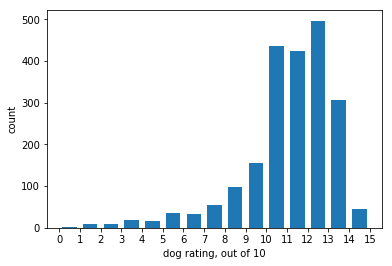

In [77]:
import numpy as np
reasonable_ratings = archive_copy.query('rating <= 30')
bin_edges = np.arange(0, 15+1, 1)
plt.hist(data=reasonable_ratings, x='rating', bins=bin_edges, rwidth=0.7)
plt.xticks(np.arange(0, 15+1, 1))
plt.xlabel('dog rating, out of 10')
plt.ylabel('count');

In [78]:
archive_copy.stage.value_counts()

Unknown           1821
pupper             223
doggo               74
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

In [79]:
# Although 84% of the 'stage' column contains no data, I chose to look at
# those dogs who are labeled with a maturity stage.

stages = archive_copy.query('stage != "Unknown"')

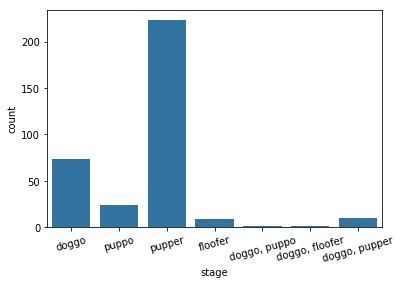

In [80]:
# I borrowed this from the subsequent lesson on data visualizations.

import seaborn as sb

level_order = ['doggo', 'floofer', 'pupper', 'doggo, pupper', 'doggo, puppo', 'doggo, floofer']
ordered_category = pd.api.types.CategoricalDtype(ordered=True, categories=level_order)
base_color = sb.color_palette()[0]
sb.countplot(data = stages, x = 'stage', color = base_color)
plt.xticks(rotation=15);

In [88]:
tweets_from_api = tweets_copy
image_frame = preds_copy
rating_frame = archive_copy

In [105]:
intermediate = pd.merge(image_frame, rating_frame, on='tweet_id', how='inner')

tweets_master = pd.merge(intermediate, tweets_from_api, on='tweet_id', how='inner')

In [106]:
tweets_master = tweets_master.to_csv(r'tweets_master.csv', index=False, header=True)
